In [7]:
import json
from pathlib import Path
import os
from tqdm import tqdm
from shutil import copy2

In [2]:
with open('/data/ocr/namvt17/HandwrittenDiffusion/IAM_transcription.json','r') as f:
    data = json.load(f)

In [4]:
len(data)

44412

In [5]:
data['0']

{'image': 'a03-034-00-00.png', 's_id': '049', 'label': 'Members'}

In [11]:
words = list()
# for id, obj in tqdm(data.items()):
#     image = obj['image']
#     wid = obj['s_id']
#     label = obj['label']
#     os.makedirs(f'/data/ocr/namvt17/FontDiffuser/iam_data/train/TargetImage/{wid}', exist_ok=True)
#     src = f'/data/ocr/namvt17/WordStylist/data/{image}'
#     dst = f'/data/ocr/namvt17/FontDiffuser/iam_data/train/TargetImage/{wid}/{wid}+{label}.png'
#     copy2(src, dst)
#     words.append(label)
#     # if id=='2':
#     #     break

100%|██████████| 44412/44412 [00:08<00:00, 4935.84it/s]


In [14]:
swords = set(words)

In [16]:
len(swords)

4916

In [28]:
from PIL import Image, ImageDraw, ImageFont

# Define text and font
def render_text(text: str,
                font_path: str = 'weights/Batang Tebo.otf',
                font_size: int = 20,
                img_size: tuple[int, int] = (64,256),
                background: tuple[int, int, int] = (255, 255, 255)
                ):
    height, width = img_size
    # Create a white image
    image = Image.new("RGB", (width, height), background)  # Replace width and height with desired values

    # Create a drawing object
    draw = ImageDraw.Draw(image)


    # Draw the text on the image
    font = ImageFont.truetype(font_path, font_size)
    bbox = draw.textbbox((0, 0), text, font=font)
    x,y,w,h = bbox
    X = (width - w)/2
    Y = (height - h)/2
    # draw.rectangle(bbox, outline='red')

    # Define text position (adjust as needed)
    text_position = (X, Y)
    draw.text(text_position, text, fill="black", font=font)
    image = image.convert('L')
    return image

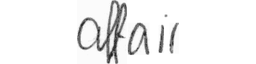

In [45]:
Image.open('iam_data/train/TargetImage/624/624+affair.png')

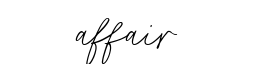

In [50]:
render_text('affair',font_path='weights/Delistan-nAAm4.ttf',font_size=78)

In [36]:
for word in tqdm(swords):
    img = render_text(word,font_path='weights/Delistan-nAAm4.ttf', font_size=36)
    img.save(f'./iam_data/train/ContentImage/Delistan-nAAm4/{word}.jpg')

100%|██████████| 4916/4916 [00:07<00:00, 696.99it/s]
